In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
scheme = {'blue':'#2f788e', 'red':'#d15b4f', 'green':'#45b563', 'grey':'#8a8888'}

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [4]:
df_merged = pd.read_csv('common_seqs_strc_km_ctrl_km_ppms.csv', index_col=0)

In [5]:
# Make the fit 
a, b = np.polyfit(df_merged['cpm_strc'], df_merged['cpm_ctrl'], 1)

In [6]:
strc_min = df_merged['cpm_strc'].min()
strc_max = df_merged['cpm_strc'].max()
ctrl_min = df_merged['cpm_ctrl'].min()
ctrl_max = df_merged['cpm_strc'].max()

min_all = min([strc_min, ctrl_min])
max_all = min([strc_max, ctrl_max])

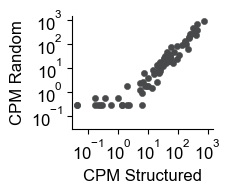

In [7]:
# Plot the result of the fit

x1 = df_merged['cpm_strc'].max()
x2 = df_merged['cpm_strc'].min()
y1 = a*x1+b
y2 = a*x2+b

sns.scatterplot(data=df_merged, x='cpm_strc', y='cpm_ctrl', color='#48494a', s=20, edgecolor=None)  
#plt.plot([x1, x2], [y1, y2], color=scheme['blue'])
plt.yscale('log')
plt.xscale('log')

plt.xlim(min_all*0.7, max_all*2)
plt.ylim(min_all*0.7, max_all*2)

plt.xticks([0.1, 1, 10, 100, 1000])
plt.yticks([0.1, 1, 10, 100, 1000])

set_size(1.9, 1.6)
sns.despine()
plt.xlabel('CPM Structured')
plt.ylabel('CPM Random')

#plt.grid(alpha=0.1)

plt.tight_layout()
#plt.savefig('cpm_strc_vs_cpm_ctrl_fit.pdf')
#plt.savefig('cpm_strc_vs_cpm_ctrl_fit.svg')

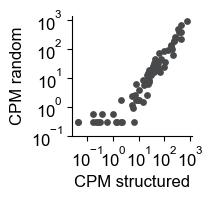

In [9]:

# Define absolute axis size in inches
axis_width = 1.2  # Width in inches
axis_height = 1.2  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
ax.scatter(df_merged['cpm_strc'], df_merged['cpm_ctrl'], color='#48494a', s=15, edgecolor=None)  

plt.yscale('log')
plt.xscale('log')

plt.xticks([0.1, 1, 10, 100, 1000])
plt.yticks([0.1, 1, 10, 100, 1000])

#ax.set_xlim(0, 10)
#ax.set_ylim(-1, 1)

plt.xlabel('CPM structured')
plt.ylabel('CPM random')

sns.despine()
plt.savefig('cpm_strc_vs_cpm_ctrl_fit.svg')